In [1]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import pandas as pd
import os
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import cv2
from tqdm.notebook import tqdm
import glob
import random
import collections
import gc
from PIL import Image
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print(torch.__version__)


1.3.1


In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import pandas as pd
import os
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import cv2
from tqdm.notebook import tqdm
import glob
import random
import collections
import gc
from PIL import Image
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

torch.__version__


adjs =  [ "Aristotelian","Arthurian","Bohemian","Brethren","Mosaic","Oceanic","Proctor","Terran","Tudor",
 "abroad","absorbing","abstract","academic","accelerated","accented","accountant","acquainted","acute",
 "addicting","addictive","adjustable","admired","adult",
 "adverse","advised","aerosol","afraid","aggravated","aggressive","agreeable","alienate","aligned","all-round","alleged","almond","alright","altruistic","ambient","ambivalent","amiable","amino",
 "amorphous","amused","anatomical","ancestral","angelic","angrier","answerable","antiquarian","antiretroviral","appellate","applicable","apportioned","approachable","appropriated","archer","aroused","arrested","assertive","assigned","athletic","atrocious","attained","authoritarian","autobiographical","avaricious","avocado","awake",
 "awsome","backstage","backwoods","balding","bandaged","banded","banned","barreled","battle","beaten","begotten","beguiled","bellied","belted","beneficent","besieged","betting","big-money","biggest","biochemical","bipolar","blackened","blame",
 "blessed","blindfolded","bloat",
 "blocked","blooded","blue-collar","blushing","boastful","bolder","bolstered","bonnie","bored",
 "boundary","bounded","bounding","branched","brawling","brazen","breeding","bridged","brimming","brimstone","broadest","broiled","broker","bronze","bruising","buffy",
 "bullied","bungling","burial","buttery","candied","canonical","cantankerous","cardinal","carefree","caretaker","casual","cathartic","causal","chapel","characterized","charcoal","cheeky","cherished","chipotle","chirping","chivalrous","circumstantial","civic",
 "civil",
 "civilised","clanking","clapping","claptrap","classless","cleansed","cleric","cloistered","codified","colloquial","colour","combat","combined","comely","commissioned","commonplace","commuter","commuting","comparable","complementary","compromising","conceding","concentrated","conceptual","conditioned","confederate","confident","confidential","confining","confuse","congressional","consequential","conservative","constituent","contaminated","contemporaneous","contraceptive","convertible","convex","cooked","coronary","corporatist","correlated","corroborated","cosmic","cover",
 "crash",
 "crypto","culminate","cushioned","dandy",
 "dashing","dazzled","decreased","decrepit","dedicated","defaced","defective","defenseless","deluded","deodorant","departed","depress","designing","despairing","destitute","detective","determined","devastating","deviant","devilish","devoted","diagonal","dictated","didactic","differentiated","diffused","dirtier","disabling","disconnected","discovered","disdainful","diseased","disfigured","disheartened","disheveled","disillusioned","disparate","dissident","doable","doctrinal","doing",
 "dotted","double-blind","downbeat","dozen",
 "draining","draught","dread",
 "dried",
 "dropped","dulled","duplicate","eaten",
 "echoing","economical","elaborated","elastic","elective","electoral","elven",
 "embryo","emerald","emergency","emissary","emotional","employed","enamel","encased","encrusted","endangered","engraved","engrossing","enlarged","enlisted","enlivened","ensconced","entangled","enthralling","entire","envious","eradicated","eroded","esoteric","essential","evaporated","ever-present","evergreen","everlasting","exacting","exasperated","excess","exciting","executable","existent","exonerated","exorbitant","exponential","export","extraordinary","exultant","exulting","facsimile","fading","fainter","faith-based","fallacious","faltering","famous","fancier","fast-growing","fated",
 "favourable","fearless","feathered","fellow","fermented","ferocious","fiddling","filling","firmer","fitted","flammable","flawed","fledgling","fleshy","flexible","flickering","floral","flowering","flowing","foggy",
 "folic",
 "foolhardy","foolish","footy",
 "forehand","forked","formative","formulaic","foul-mouthed","fractional","fragrant","fraudulent","freakish","freckled","freelance","freight","fresh",
 "fretted","frugal","fulfilling","fuming","funded","funny",
 "garbled","gathered","geologic","geometric","gibberish","gilded","ginger","glare",
 "glaring","gleaming","glorified","glorious","goalless","gold-plated","goody",
 "grammatical","grande","grateful","gratuitous","graven","greener","grinding","grizzly","groaning","grudging","guaranteed","gusty",
 "half-breed","hand-held","handheld","hands-off","hard-pressed","harlot","healing","healthier","healthiest","heart",
 "heart-shaped","heathen","hedonistic","heralded","herbal","high-density","high-performance","high-res","high-yield","hissy",
 "hitless","holiness","homesick","honorable","hooded","hopeless","horrendous","horrible","hot-button","huddled","human",
 "humbling","humid",
 "humiliating","hypnotized","idealistic","idiosyncratic","ignited","illustrated","illustrative","imitated","immense","immersive","immigrant","immoral","impassive","impressionable","improbable","impulsive","in-between","in-flight","inattentive","inbound","inbounds","incalculable","incomprehensible","indefatigable","indigo","indiscriminate","indomitable","inert",
 "inflate","inform","inheriting","injured","injurious","inking","inoffensive","insane","insensible","insidious","insincere","insistent","insolent","insufferable","intemperate","interdependent","interesting","interfering","intern","interpreted","intersecting","intolerable","intolerant","intuitive","irresolute","irritate","jealous","jerking","joining","joint",
 "journalistic","joyful","keyed",
 "knowing","lacklustre","laden",
 "lagging","lamented","laughable","layered","leather","leathern","leery",
 "left-footed","legible","leisure","lessening","liberating","life-size","lifted","lightest","limitless","listening","literary","liver",
 "livid",
 "lobster","locked","long-held","long-lasting","long-running","long-suffering","loudest","loveliest","low-budget","low-carb","lowering","lucid",
 "luckless","lusty",
 "luxurious","magazine","maniac","manmade","maroon","mastered","mated",
 "material","materialistic","meaningful","measuring","mediaeval","medical","meditated","medley","melodic","memorable","memorial","metabolic","metallic","metallurgical","metering","midair","midterm","midway","mighty","migrating","mind-blowing","mind-boggling","minor",
 "mirrored","misguided","misshapen","mitigated","mixed",
 "modernized","molecular","monarch","monastic","morbid","motley","motorized","mounted","multi-million","multidisciplinary","muscled","muscular","muted",
 "mysterious","mythic","nail-biting","natural","nauseous","negative","networked","neurological","neutered","newest","night",
 "nitrous","no-fly","noncommercial","nonsense","north",
 "nuanced","occurring","offensive","oldest","oncoming","one-eyed","one-year","onstage","onward","opaque","open-ended","operating","opportunist","opposing","opt-in","ordinate","outdone","outlaw","outsized","overboard","overheated","oversize","overworked","oyster","paced",
 "panting","paralyzed","paramount","parental","parted","partisan","passive","pastel","patriot","peacekeeping","pedestrian","peevish","penal",
 "penned","pensive","perceptual","perky",
 "permissible","pernicious","perpetuate","perplexed","pervasive","petrochemical","philosophical","picturesque","pillaged","piped",
 "piquant","pitching","plausible","pliable","plumb",
 "politician","polygamous","poorest","portmanteau","posed",
 "positive","possible","postpartum","prank",
 "pre-emptive","precocious","predicted","premium","preparatory","prerequisite","prescient","preserved","presidential","pressed","pressurized","presumed","prewar","priced","pricier","primal","primer","primetime","printed","private","problem","procedural","process","prodigious","professional","programmed","progressive","prolific","promising","promulgated","pronged","proportionate","protracted","pulled","pulsed","purgatory","quick",
 "rapid-fire","raunchy","razed",
 "reactive","readable","realizing","recognised","recovering","recurrent","recycled","redeemable","reflecting","regal",
 "registering","reliable","reminiscent","remorseless","removable","renewable","repeating","repellent","reserve","resigned","respectful","rested","restrict","resultant","retaliatory","retiring","revelatory","reverend","reversing","revolving","ridiculous","right-hand","ringed","risque","robust","roomful","rotating","roused","rubber","run-down","running","runtime","rustling","safest","salient","sanctioned","saute",
 "saved",
 "scandalized","scarlet","scattering","sceptical","scheming","scoundrel","scratched","scratchy","scrolled","seated","second-best","segregated","self-taught","semiautomatic","senior","sensed","sentient","sexier","shadowy","shaken","shaker","shameless","shaped","shiny",
 "shipped","shivering","shoestring","short",
 "short-lived","signed","simplest","simplistic","sizable","skeleton","skinny","skirting","skyrocketed","slamming","slanting","slapstick","sleek",
 "sleepless","sleepy","slender","slimmer","smacking","smokeless","smothered","smouldering","snuff",
 "socialized","solid-state","sometime","sought","spanking","sparing","spattered","specialized","specific","speedy","spherical","spiky",
 "spineless","sprung","squint","stainless","standing","starlight","startled","stately","statewide","stereoscopic","sticky","stimulant","stinky","stoked","stolen","storied","strained","strapping","strengthened","stubborn","stylized","suave",
 "subjective","subjugated","subordinate","succeeding","suffering","summary","sunset","sunshine","supernatural","supervisory","supply-side","surrogate","suspended","suspenseful","swarthy","sweating","sweeping","swinging","swooning","sympathize","synchronized","synonymous","synthetic","tailed","tallest","tangible","tanked","tarry",
 "technical","tectonic","telepathic","tenderest","territorial","testimonial","theistic","thicker","threatening","tight-lipped","timed",
 "timely","timid",
 "torrent","totalled","tougher","traditional","transformed","trapped","traveled","traverse","treated","trial",
 "trunk",
 "trusting","trying","twisted","two-lane","tyrannical","unaided","unassisted","unassuming","unattractive","uncapped","uncomfortable","uncontrolled","uncooked","uncooperative","underground","undersea","undisturbed","unearthly","uneasy","unequal","unfazed","unfinished","unforeseen","unforgivable","unidentified","unimaginative","uninspired","unintended","uninvited","universal","unmasked","unorthodox","unparalleled","unpleasant","unprincipled","unread","unreasonable","unregulated","unreliable","unremitting","unsafe","unsanitary","unsealed","unsuccessful","unsupervised","untimely","unwary","unwrapped","uppity","upstart","useless","utter",
 "valiant","valid",
 "valued","vanilla","vaulting","vaunted","veering","vegetative","vented","verbal","verifying","veritable","versed","vinyl",
 "virgin","visceral","visual","voluptuous","walk-on","wanton","warlike","washed","waterproof","waved",
 "weakest","well-bred","well-chosen","well-informed","wetting","wheeled","whirlwind","widen",
 "widening","willful","willing","winnable","winningest","wireless","wistful","woeful","wooded","woodland","wordless","workable","worldly","worldwide","worst-case","worsted","worthless"]

pnames = ["Bulbasaur","Ivysaur","Venusaur","Charmander","Charmeleon","Charizard","Squirtle","Wartortle","Blastoise","Caterpie","Metapod","Butterfree","Weedle","Kakuna","Beedrill","Pidgey","Pidgeotto","Pidgeot","Rattata","Raticate","Spearow","Fearow","Ekans",
 "Arbok",
 "Pikachu","Raichu","Sandshrew","Sandslash","Nidoran♀","Nidorina","Nidoqueen","Nidoran♂","Nidorino","Nidoking","Clefairy","Clefable","Vulpix","Ninetales","Jigglypuff","Wigglytuff","Zubat",
 "Golbat","Oddish","Gloom",
 "Vileplume","Paras",
 "Parasect","Venonat","Venomoth","Diglett","Dugtrio","Meowth","Persian","Psyduck","Golduck","Mankey","Primeape","Growlithe","Arcanine","Poliwag","Poliwhirl","Poliwrath","Abra",
 "Kadabra","Alakazam","Machop","Machoke","Machamp","Bellsprout","Weepinbell","Victreebel","Tentacool","Tentacruel","Geodude","Graveler","Golem",
 "Ponyta","Rapidash","Slowpoke","Slowbro","Magnemite","Magneton","Farfetch’d","Doduo",
 "Dodrio","Seel",
 "Dewgong","Grimer","Muk",
 "Shellder","Cloyster","Gastly","Haunter","Gengar","Onix",
 "Drowzee","Hypno",
 "Krabby","Kingler","Voltorb","Electrode","Exeggcute","Exeggutor","Cubone","Marowak","Hitmonlee","Hitmonchan","Lickitung","Koffing","Weezing","Rhyhorn","Rhydon","Chansey","Tangela","Kangaskhan","Horsea","Seadra","Goldeen","Seaking","Staryu","Starmie","Mr. Mime","Scyther","Jynx",
 "Electabuzz","Magmar","Pinsir","Tauros","Magikarp","Gyarados","Lapras","Ditto",
 "Eevee",
 "Vaporeon","Jolteon","Flareon","Porygon","Omanyte","Omastar","Kabuto","Kabutops","Aerodactyl","Snorlax","Articuno","Zapdos","Moltres","Dratini","Dragonair","Dragonite","Mewtwo","Mew",
 "Chikorita","Bayleef","Meganium","Cyndaquil","Quilava","Typhlosion","Totodile","Croconaw","Feraligatr","Sentret","Furret","Hoothoot","Noctowl","Ledyba","Ledian","Spinarak","Ariados","Crobat","Chinchou","Lanturn","Pichu",
 "Cleffa","Igglybuff","Togepi","Togetic","Natu",
 "Xatu",
 "Mareep","Flaaffy","Ampharos","Bellossom","Marill","Azumarill","Sudowoodo","Politoed","Hoppip","Skiploom","Jumpluff","Aipom",
 "Sunkern","Sunflora","Yanma",
 "Wooper","Quagsire","Espeon","Umbreon","Murkrow","Slowking","Misdreavus","Unown",
 "Wobbuffet","Girafarig","Pineco","Forretress","Dunsparce","Gligar","Steelix","Snubbull","Granbull","Qwilfish","Scizor","Shuckle","Heracross","Sneasel","Teddiursa","Ursaring","Slugma","Magcargo","Swinub","Piloswine","Corsola","Remoraid","Octillery","Delibird","Mantine","Skarmory","Houndour","Houndoom","Kingdra","Phanpy","Donphan","Porygon2","Stantler","Smeargle","Tyrogue","Hitmontop","Smoochum","Elekid","Magby",
 "Miltank","Blissey","Raikou","Entei",
 "Suicune","Larvitar","Pupitar","Tyranitar","Lugia",
 "Ho-Oh",
 "Celebi","Treecko","Grovyle","Sceptile","Torchic","Combusken","Blaziken","Mudkip","Marshtomp","Swampert","Poochyena","Mightyena","Zigzagoon","Linoone","Wurmple","Silcoon","Beautifly","Cascoon","Dustox","Lotad",
 "Lombre","Ludicolo","Seedot","Nuzleaf","Shiftry","Taillow","Swellow","Wingull","Pelipper","Ralts",
 "Kirlia","Gardevoir","Surskit","Masquerain","Shroomish","Breloom","Slakoth","Vigoroth","Slaking","Nincada","Ninjask","Shedinja","Whismur","Loudred","Exploud","Makuhita","Hariyama","Azurill","Nosepass","Skitty","Delcatty","Sableye","Mawile","Aron",
 "Lairon","Aggron","Meditite","Medicham","Electrike","Manectric","Plusle","Minun",
 "Volbeat","Illumise","Roselia","Gulpin","Swalot","Carvanha","Sharpedo","Wailmer","Wailord","Numel",
 "Camerupt","Torkoal","Spoink","Grumpig","Spinda","Trapinch","Vibrava","Flygon","Cacnea","Cacturne","Swablu","Altaria","Zangoose","Seviper","Lunatone","Solrock","Barboach","Whiscash","Corphish","Crawdaunt","Baltoy","Claydol","Lileep","Cradily","Anorith","Armaldo","Feebas","Milotic","Castform","Kecleon","Shuppet","Banette","Duskull","Dusclops","Tropius","Chimecho","Absol",
 "Wynaut","Snorunt","Glalie","Spheal","Sealeo","Walrein","Clamperl","Huntail","Gorebyss","Relicanth","Luvdisc","Bagon",
 "Shelgon","Salamence","Beldum","Metang","Metagross","Regirock","Regice","Registeel","Latias","Latios","Kyogre","Groudon","Rayquaza","Jirachi","Deoxys","Turtwig","Grotle","Torterra","Chimchar","Monferno","Infernape","Piplup","Prinplup","Empoleon","Starly","Staravia","Staraptor","Bidoof","Bibarel","Kricketot","Kricketune","Shinx",
 "Luxio",
 "Luxray","Budew",
 "Roserade","Cranidos","Rampardos","Shieldon","Bastiodon","Burmy",
 "Wormadam","Mothim","Combee","Vespiquen","Pachirisu","Buizel","Floatzel","Cherubi","Cherrim","Shellos","Gastrodon","Ambipom","Drifloon","Drifblim","Buneary","Lopunny","Mismagius","Honchkrow","Glameow","Purugly","Chingling","Stunky","Skuntank","Bronzor","Bronzong","Bonsly","Mime Jr.","Happiny","Chatot","Spiritomb","Gible",
 "Gabite","Garchomp","Munchlax","Riolu",
 "Lucario","Hippopotas","Hippowdon","Skorupi","Drapion","Croagunk","Toxicroak","Carnivine","Finneon","Lumineon","Mantyke","Snover","Abomasnow","Weavile","Magnezone","Lickilicky","Rhyperior","Tangrowth","Electivire","Magmortar","Togekiss","Yanmega","Leafeon","Glaceon","Gliscor","Mamoswine","Porygon-Z","Gallade","Probopass","Dusknoir","Froslass","Rotom",
 "Uxie",
 "Mesprit","Azelf",
 "Dialga","Palkia","Heatran","Regigigas","Giratina","Cresselia","Phione","Manaphy","Darkrai","Shaymin","Arceus","Victini","Snivy",
 "Servine","Serperior","Tepig",
 "Pignite","Emboar","Oshawott","Dewott","Samurott","Patrat","Watchog","Lillipup","Herdier","Stoutland","Purrloin","Liepard","Pansage","Simisage","Pansear","Simisear","Panpour","Simipour","Munna",
 "Musharna","Pidove","Tranquill","Unfezant","Blitzle","Zebstrika","Roggenrola","Boldore","Gigalith","Woobat","Swoobat","Drilbur","Excadrill","Audino","Timburr","Gurdurr","Conkeldurr","Tympole","Palpitoad","Seismitoad","Throh",
 "Sawk",
 "Sewaddle","Swadloon","Leavanny","Venipede","Whirlipede","Scolipede","Cottonee","Whimsicott","Petilil","Lilligant","Basculin","Sandile","Krokorok","Krookodile","Darumaka","Darmanitan","Maractus","Dwebble","Crustle","Scraggy","Scrafty","Sigilyph","Yamask","Cofagrigus","Tirtouga","Carracosta","Archen","Archeops","Trubbish","Garbodor","Zorua",
 "Zoroark","Minccino","Cinccino","Gothita","Gothorita","Gothitelle","Solosis","Duosion","Reuniclus","Ducklett","Swanna","Vanillite","Vanillish","Vanilluxe","Deerling","Sawsbuck","Emolga","Karrablast","Escavalier","Foongus","Amoonguss","Frillish","Jellicent","Alomomola","Joltik","Galvantula","Ferroseed","Ferrothorn","Klink",
 "Klang",
 "Klinklang","Tynamo","Eelektrik","Eelektross","Elgyem","Beheeyem","Litwick","Lampent","Chandelure","Axew",
 "Fraxure","Haxorus","Cubchoo","Beartic","Cryogonal","Shelmet","Accelgor","Stunfisk","Mienfoo","Mienshao","Druddigon","Golett","Golurk","Pawniard","Bisharp","Bouffalant","Rufflet","Braviary","Vullaby","Mandibuzz","Heatmor","Durant","Deino",
 "Zweilous","Hydreigon","Larvesta","Volcarona","Cobalion","Terrakion","Virizion","Tornadus","Thundurus","Reshiram","Zekrom","Landorus","Kyurem","Keldeo","Meloetta","Genesect","Chespin","Quilladin","Chesnaught","Fennekin","Braixen","Delphox","Froakie","Frogadier","Greninja","Bunnelby","Diggersby","Fletchling","Fletchinder","Talonflame","Scatterbug","Spewpa","Vivillon","Litleo","Pyroar","Flabebe","Floette","Florges","Skiddo","Gogoat","Pancham","Pangoro","Furfrou","Espurr","Meowstic","Honedge","Doublade","Aegislash","Spritzee","Aromatisse","Swirlix","Slurpuff","Inkay",
 "Malamar","Binacle","Barbaracle","Skrelp","Dragalge","Clauncher","Clawitzer","Helioptile","Heliolisk","Tyrunt","Tyrantrum","Amaura","Aurorus","Sylveon","Hawlucha","Dedenne","Carbink","Goomy",
 "Sliggoo","Goodra","Klefki","Phantump","Trevenant","Pumpkaboo","Gourgeist","Bergmite","Avalugg","Noibat","Noivern","Xerneas","Yveltal","Zygarde","Diancie","Hoopa",
 "Volcanion","Rowlet","Dartrix","Decidueye","Litten","Torracat","Incineroar","Popplio","Brionne","Primarina","Pikipek","Trumbeak","Toucannon","Yungoos","Gumshoos","Grubbin","Charjabug","Vikavolt","Crabrawler","Crabominable","Oricorio","Cutiefly","Ribombee","Rockruff","Lycanroc","Wishiwashi","Mareanie","Toxapex","Mudbray","Mudsdale","Dewpider","Araquanid","Fomantis","Lurantis","Morelull","Shiinotic","Salandit","Salazzle","Stufful","Bewear","Bounsweet","Steenee","Tsareena","Comfey","Oranguru","Passimian","Wimpod","Golisopod","Sandygast","Palossand","Pyukumuku","Type: Null","Silvally","Minior","Komala","Turtonator","Togedemaru","Mimikyu","Bruxish","Drampa","Dhelmise","Jangmo-o","Hakamo-o","Kommo-o","Tapu Koko","Tapu Lele","Tapu Bulu","Tapu Fini","Cosmog","Cosmoem","Solgaleo","Lunala","Nihilego","Buzzwole","Pheromosa","Xurkitree","Celesteela","Kartana","Guzzlord","Necrozma","Magearna","Marshadow","Poipole","Naganadel","Stakataka","Blacephalon","Zeraora","Meltan","Melmetal"
 ]

gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
gpu

def get_name():
   return  random.sample(adjs, 1)[0] + "_" + random.sample(pnames, 1)[0] 
get_name()


data_dir = '/home/ec2-user/dfdc/dfdc_ds/frames'
img_dir = ''
REAL = 0
FAKE = 1

meta = pd.read_csv(f'{data_dir}/metadata.csv', converters= {
    'label': lambda x: FAKE if x == 'FAKE' else REAL,
    'filename': lambda v: v.replace('.mp4', ''),
    'original': lambda v: v.replace('.mp4', ''),
    'folder': lambda v: int(v.split('_')[-1])
})

meta['label'].value_counts()
realOnly = meta[meta['label'] == REAL].sort_values(by='folder')
print(len(realOnly))
allByFolder = meta.groupby('folder')
allByFolder.count()
pd.crosstab(meta['folder'], meta['label'], normalize='index').round(4) * 100
#pd.crosstab(meta['folder'], meta['label'])


19154


label,0,1
folder,,
0,6.45,93.55
1,6.36,93.64
2,13.16,86.84
3,15.05,84.95
4,10.76,89.24
5,14.50,85.50
6,12.21,87.79
7,13.67,86.33
8,15.25,84.75


In [3]:
SQR_IMG_SIDE=500

In [4]:
split_folders = [7, 17, 27, 37, 47]

def build_train_df(seed=None):
    trainByFolderAndOriginal = meta[~meta['folder'].isin(split_folders)].groupby(['folder', 'original'])
    np.random.seed(seed) # change this for new train/val split
    randomized_pairs = trainByFolderAndOriginal.agg(np.random.choice)
    np.random.seed()
    flattened = randomized_pairs.reset_index()
    flattened.head()
    OneFakePerOriginal = flattened.drop(flattened[flattened.original == ''].index)
    print(len(OneFakePerOriginal)) # should be equivelant to the # of real videos far above!
    OneFakePerOriginal.head()
    t_fake = OneFakePerOriginal
    t_real = realOnly[~realOnly['folder'].isin(split_folders)]
    print(len(t_fake), len(t_real))
    train = pd.concat([t_fake, t_real])
    return train
    
def build_val_df(seed=999):
    valByFolderAndOriginal = meta[meta['folder'].isin(split_folders)].groupby(['folder', 'original'])
    np.random.seed(seed) # change this for new val split
    randomized_pairs = valByFolderAndOriginal.agg(np.random.choice)
    np.random.seed()
    flattened = randomized_pairs.reset_index()
    flattened.head()
    OneFakePerOriginal = flattened.drop(flattened[flattened.original == ''].index)
    print(len(OneFakePerOriginal)) # should be equivelant to the # of real videos far above!
    OneFakePerOriginal.head()
    v_fake = OneFakePerOriginal
    v_real = realOnly[realOnly['folder'].isin(split_folders)]
    print(len(v_fake), len(v_real))
    val = pd.concat([v_fake, v_real])
    return val


In [5]:
from torch.utils.data import Dataset
from torchvision.transforms import Normalize
import torchvision.transforms as transforms

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

class Unnormalize:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        mean = torch.as_tensor(self.mean, dtype=tensor.dtype, device=tensor.device).view(3, 1, 1)
        std = torch.as_tensor(self.std, dtype=tensor.dtype, device=tensor.device).view(3, 1, 1)
        return torch.clamp(tensor * std + mean, 0., 1.)
    
unnormalize_transform = Unnormalize(mean, std)

def resize_image(img, size):
    h, w = img.shape[:2]
    if w > h:
        h = h * size // w
        w = size
    else:
        w = w * size // h
        h = size

    resized = cv2.resize(img, (w, h))
    return resized


def make_square_image(img):
    h, w = img.shape[:2]
    size = max(h, w)
    t = 0
    b = size - h
    l = 0
    r = size - w
    return cv2.copyMakeBorder(img, t, b, l, r, cv2.BORDER_CONSTANT, value=0)

import time as t
timer = True

def load_image_and_label(filename, cls, crops_dir, folder_num, image_size, augment):
    """Loads an image into a tensor. Also returns its label."""
    try:
        files = os.listdir(f'{crops_dir}/dfdc_train_part_{str(folder_num)}/{filename}')
        # only randomize frame per video in training set
        if augment:
            np.random.seed()
            p = np.random.choice(np.array(files))
        else:
            np.random.seed(99)
            p = np.random.choice(np.array(files))
            np.random.seed()

        img = cv2.imread(os.path.join(crops_dir, f'dfdc_train_part_{folder_num}', filename, p))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if (img.shape[0] > img.shape[1]):
            img = img[0: int(img.shape[0] - (img.shape[0] * 0.30)), :]
        else:
            img = img[:, 0 + int(img.shape[1] * 0.15): int(img.shape[1] - img.shape[1] * 0.15)]
        img = resize_image(img, image_size)
        if augment: 
            im_pil = Image.fromarray(img)
            train_trans = transforms.Compose([
                transforms.RandomRotation(degrees=10),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(brightness=0.5, contrast=0, saturation=0, hue=0)
            ])
            img = train_trans(im_pil)
            img = np.asarray(img)

        img = make_square_image(img)
        generic_trans = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])
        img = generic_trans(img)
        target = cls
        return img, target
    except:
        print(f'failed to load file: {filename}, folder: {folder_num}')
        raise


class MyDataset(Dataset):
    def __init__(self, crops_dir, df, split, image_size, sample_size=None, seed=None):
        self.crops_dir = crops_dir
        self.split = split
        self.image_size = image_size
        self.df = df
        num_real = len(self.df[self.df["label"] == REAL])
        num_fake = len(self.df[self.df["label"] == FAKE])
        print("%s dataset has %d real videos, %d fake videos" % (split, num_real, num_fake))

    def __getitem__(self, index):
        row = self.df.iloc[index]
        filename = row["filename"]
        cls = row["label"]
        folder_num = row['folder']
        return load_image_and_label(filename, 
                                    cls, 
                                    self.crops_dir, 
                                    folder_num,
                                    self.image_size, 
                                    self.split == "train")
    def __len__(self):
        return len(self.df)

# Training Loops

In [6]:
def evaluate(net, data_loader, device, silent=False):
    net.train(False)
    bce_loss = 0
    total_examples = 0

    with tqdm(total=len(data_loader), desc="Evaluation", leave=False, disable=silent) as pbar:
        for batch_idx, data in enumerate(data_loader):
            with torch.no_grad():
                batch_size = data[0].shape[0]
                x = data[0].to(device)
                y_true = data[1].to(device).float()

                y_pred = net(x)
                y_pred = y_pred.squeeze()

                bce_loss += F.binary_cross_entropy_with_logits(y_pred, y_true).item() * batch_size

            total_examples += batch_size
            pbar.update()

    bce_loss /= total_examples

    if silent:
        return bce_loss
    else:
        print("BCE: %.4f" % (bce_loss))
    return bce_loss

In [7]:
def fit(epochs, cp=True):
    global history, iteration, epochs_done, lr

    with tqdm(total=len(tdl), leave=False) as pbar:
        for epoch in range(epochs):
            pbar.reset()
            pbar.set_description("Epoch %d" % (epochs_done + 1))
            bce_loss = 0
            total_examples = 0
            net.train(True)
            for batch_idx, data in enumerate(tdl):
                batch_size = data[0].shape[0]
                x = data[0].to(gpu)
                y_true = data[1].to(gpu).float()
                
                optimizer.zero_grad()

                y_pred = net(x)
                y_pred = y_pred.squeeze()
                
                loss = F.binary_cross_entropy_with_logits(y_pred, y_true)
                loss.backward()
                optimizer.step()
                
                batch_bce = loss.item()
                bce_loss += batch_bce * batch_size
                
                
                
                history["train_bce"].append(batch_bce)

                total_examples += batch_size
                
                iloss = round(bce_loss / total_examples, 4)
                
                pbar.set_description(f"Epoch {epochs_done + 1} (loss:{iloss}) ")
                
                iteration += 1
                pbar.update()

            bce_loss /= total_examples
            epochs_done += 1

            print("Epoch: %3d, train BCE: %.4f" % (epochs_done, bce_loss))

            val_bce_loss = evaluate(net, vdl, device=gpu, silent=True)
            history["val_bce"].append(val_bce_loss)
            
            print("              val BCE: %.4f" % (val_bce_loss))
            
            if (cp == True 
                and (len(history['val_bce']) == 0 
                     or val_bce_loss <= np.min(np.array(history['val_bce'])))
               ):
                if (net.module is not None):
                    torch.save({
                            'epoch': epochs_done,
                            'model_state_dict': net.module.state_dict(),
                            'optimizer_state_dict': optimizer.state_dict(),
                            'loss': val_bce_loss
                            }, f"{name}.ckpt.pth")
                    print(f'saved: {name}.ckpt.pth')
                else:
                    torch.save({
                            'epoch': epochs_done,
                            'model_state_dict': net.state_dict(),
                            'optimizer_state_dict': optimizer.state_dict(),
                            'loss': vloss
                            }, f"{name}.ckpt.pth")
                    print(f'saved: {name}.ckpt.pth')
    
            # TODO: can do LR annealing here


# Model 

In [8]:
import torchvision.models as models
import torch.nn as nn

##Load new model
def get_model(pretrained = True):
    model = torch.hub.load('pytorch/vision:v0.5.0', 
                           'resnext50_32x4d', 
                           pretrained=pretrained)
    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential(
#         nn.Dropout(0.6),
        nn.Linear(num_ftrs, 1)
    )
    return model


In [9]:
def load_model_from_checkpoint():
    model = get_model(False)
    name = 'assigned_Thundurus.ckpt.pth'
    checkpoint = torch.load(name)
    model.load_state_dict(checkpoint['model_state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return model, epoch

# Training Data loader Parameters

17098
17098 17098
2056
2056 2056
34196 4112
['ycgrwhoaqk' 32 1080 0 '' 'train' 1920]


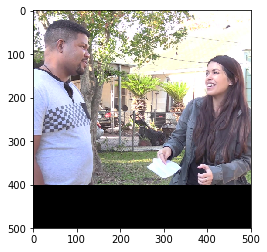

In [10]:
train = build_train_df()
val = build_val_df(991)
print(len(train), len(val))
r = train.sample().values[0]
print(r)
img_tensor, label = load_image_and_label(r[0], 1, data_dir, r[1], SQR_IMG_SIDE, False)
plt.imshow(unnormalize_transform(img_tensor).permute(1, 2, 0))

In [12]:
train_ds = MyDataset(data_dir, train, 'train', SQR_IMG_SIDE)
val_ds = MyDataset(data_dir, val, 'val', SQR_IMG_SIDE)

train dataset has 17098 real videos, 17098 fake videos
val dataset has 2056 real videos, 2056 fake videos


In [13]:
GPUS = torch.cuda.device_count()

In [14]:
batch_size = 32
num_workers = 16
pin_memory = True
if GPUS > 1:
  batch_size = 64
  pin_memory = True
  num_workers = 16

In [15]:
%%time
def create_data_loaders(num_workers):
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, 
                              num_workers=num_workers, pin_memory=pin_memory)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, 
                            num_workers=num_workers, pin_memory=pin_memory)

    return train_loader, val_loader

tdl, vdl = create_data_loaders(num_workers)



CPU times: user 117 µs, sys: 7 µs, total: 124 µs
Wall time: 134 µs


In [ ]:
# vit = iter(vdl)
# X, y = next(vit)
# plt.imshow(unnormalize_transform(X[0]).permute(1, 2, 0))
# print(y[0])
# del vit

In [ ]:
# itr = iter(tdl)
# X, y = next(itr)
# X, y = next(itr)
# plt.imshow(unnormalize_transform(X[0]).permute(1, 2, 0))
# print(y[0])

# del itr
# torch.cuda.empty_cache()

# Training 

In [ ]:
name = get_name()
name

In [ ]:
history = { "train_bce": [], "val_bce": [] }
iteration = 0

In [ ]:
# Load existing model to resume
model, epochs_done = load_model_from_checkpoint()

In [ ]:
# Load new Model
model = get_model(True)
epochs_done = 0

In [ ]:
if GPUS > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  model = nn.DataParallel(model)
net = model.to(gpu)
net

In [ ]:
def freeze_until(net, param_name):
    found_name = False
    for name, params in net.named_parameters():
        print(name)
        if name == param_name:
            found_name = True
        params.requires_grad = found_name

freeze_until(net, "module.layer2.0.conv1.weight")

In [ ]:
[k for k,v in net.named_parameters() if v.requires_grad]

In [ ]:
# lr = GPUS * 0.00015
optimizer = torch.optim.Adam(net.parameters(), lr=0.00009)

In [ ]:
fit(2)

In [ ]:
fit(5)


In [ ]:
optimizer = torch.optim.SGD(net.parameters(), 
                            lr=0.001, 
                            momentum=0.9,
                            nesterov=False)
fit(2)

In [ ]:
fit(5)

# Evaluation and export 

In [16]:
del net
model, epoch = load_model_from_checkpoint()
net = model.to(gpu)

Using cache found in /home/ec2-user/.cache/torch/hub/pytorch_vision_v0.5.0


In [ ]:
plt.plot(history["train_bce"])

In [ ]:
plt.plot(history["val_bce"])

In [17]:
vloss = evaluate(net, vdl, device=gpu)

BCE: 0.2930


In [20]:
name = 'assigned_Thundurus'
def export():
    torch.save(net, f"{name}-{vloss}.all.pth")
    print('saved model')
export()


saved model


In [ ]:
import gc
try:
    del net
    del tdl
    del vdl
    del optimizer
except:
    pass
torch.cuda.empty_cache()
gc.collect() 


# Experiments log

- AdamW has regularization built in
- increasing num of worker around 10 sped up epoch time across 4 gpus (much less lag), but its slower in the notebook manual load image (i think there is an overhead to setup workers)
- unfreezed back to layer 3 in resnext seems to yeild better learning
- unfreezed the whole model, because layer 3 and down freeze overfitted at 0.50 loss
- using SGD seems to give good results after 10 epochs with AdamW
- 